<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Writing-a-thesis/blob/main/day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##인공신경망
  - 입력층 : 데이터를 입력
  - 은닉층 : 학습과정이 보이지 않는다.
  - 출력층 : 출력
  - 가중치와 바이어스

In [9]:
# 텐서플로우 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [10]:
## 입력층, 은닉층, 출력층, 오차역전파
tf.random.set_seed(42)  # Use tf.random.set_seed to set the global random seed
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [11]:
x_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [12]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
indexes = [np.where(y_train==i)[0][0] for i in range(10)]

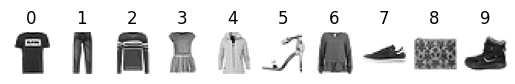

In [14]:
# plt.figure(figsize=(10,10))
for i, value in enumerate(indexes):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[value], cmap='gray_r')
  plt.axis('off')
  plt.title(y_train[value])
plt.show()


In [15]:
# 전처리
x_train_scaled = (x_train.astype('float32')/255.0).reshape(x_train.shape[0], -1)
x_test_scaled = (x_test.astype('float32')/255.0).reshape(x_test.shape[0], -1)

In [16]:
x_train_scaled.shape , x_test_scaled.shape

((60000, 784), (10000, 784))

In [16]:
# 로지스틱 회귀를 이용한 분류모델

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x_train_scaled, y_train)
lr.score(x_test_scaled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8431

In [24]:
# decisiontree 적용
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
dt.score(x_test_scaled, y_test)

0.789

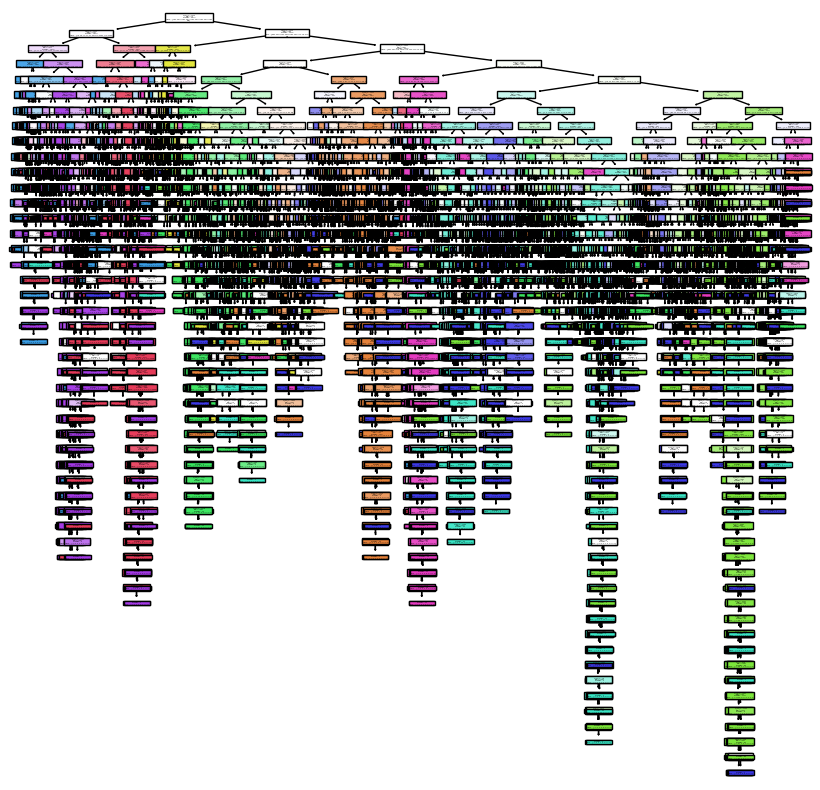

In [25]:
# tree 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt, filled=True, feature_names=None)
plt.show()


In [26]:
# randomforest 적용
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
rf.score(x_test_scaled, y_test)

0.8743

In [27]:
# crossvalidation
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, x_train_scaled, y_train, return_train_score=True, n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [28]:
scores

{'fit_time': array([80.06779408, 92.84055686, 98.02446818, 80.13478827, 85.52951026]),
 'score_time': array([0.46907902, 0.4130013 , 0.40497756, 0.71410871, 0.4311192 ]),
 'test_score': array([0.88266667, 0.8775    , 0.88625   , 0.885     , 0.88066667]),
 'train_score': array([0.99997917, 1.        , 1.        , 1.        , 1.        ])}

In [29]:
# train 데이터를 train + val 나눈다. 총 3개의 데이터를 사용
from sklearn.model_selection import train_test_split
x , x_val_scaled , y , y_val = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

In [30]:
x.shape , x_val_scaled.shape , y.shape , y_val.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [33]:
# 활성화 함수 ... 분류모델 중 .... 이진 sigmoid  다중분류 softmax
# Use tf.keras.layers.Dense instead of just Dense to avoid potential conflicts
dense_layer = tf.keras.layers.Dense(10, activation='softmax', input_shape = (784,))
model = tf.keras.Sequential([dense_layer])  # Pass the layer as a list
# Pass 'accuracy' as a list to the metrics argument
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 손실함수와 평가방법 (정확성)
model.fit(x, y, epochs=50, validation_data=(x_val_scaled, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7341 - loss: 0.7844 - val_accuracy: 0.8275 - val_loss: 0.5039
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8327 - loss: 0.4861 - val_accuracy: 0.8384 - val_loss: 0.4686
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8450 - loss: 0.4572 - val_accuracy: 0.8426 - val_loss: 0.4546
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8503 - loss: 0.4430 - val_accuracy: 0.8447 - val_loss: 0.4478
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8531 - loss: 0.4342 - val_accuracy: 0.8463 - val_loss: 0.4441
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8551 - loss: 0.4281 - val_accuracy: 0.8473 - val_loss: 0.4421
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.4236 - val_accuracy: 0.8479 - val_loss: 0.4411
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8578 - loss: 0.4200 - 

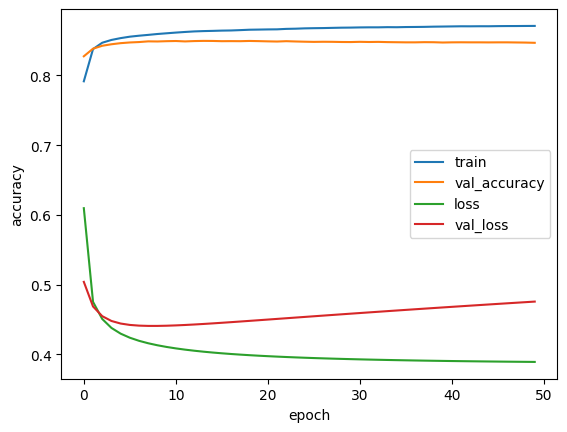

In [37]:
# accuracy와 val_accuracy 시각화
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val_accuracy','loss','val_loss'])
plt.show()

In [38]:
model.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8353 - loss: 0.4998


[0.5126374363899231, 0.8331999778747559]

## 심층신경망

In [57]:
dense1 = tf.keras.layers.Dense(100, activation='sigmoid', input_shape = (784,)) # 신경망을 비선형으로 만들어서 더 복잡한 패턴을 학습할 수 있도록
dense2 = tf.keras.layers.Dense(10, activation='softmax')

model = tf.keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=30, validation_data=(x_val_scaled, y_val))

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7420 - loss: 0.8107 - val_accuracy: 0.8417 - val_loss: 0.4385
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8488 - loss: 0.4269 - val_accuracy: 0.8578 - val_loss: 0.3890
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8635 - loss: 0.3821 - val_accuracy: 0.8647 - val_loss: 0.3655
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8738 - loss: 0.3540 - val_accuracy: 0.8700 - val_loss: 0.3508
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8801 - loss: 0.3326 - val_accuracy: 0.8737 - val_loss: 0.3402
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8870 - loss: 0.3152 - val_accuracy: 0.8766 - val_loss: 0.3325
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8916 - loss: 0.3007 - val_accuracy: 0.8802 - val_loss: 0.3265
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8956 - loss: 0.2881 - 

In [59]:
model.evaluate(x_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3747


[0.3704083561897278, 0.8779000043869019]

In [43]:
tf.random.set_seed(42)  # Use tf.random.set_seed to set the global random seed
(train_x, train_y),(test_x,test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0
x_train, x_val, y_train, y_val =  train_test_split(train_x, train_y, test_size=0.2, random_state=42)
train_x.shape , x_train.shape , x_val.shape , train_y.shape, y_train.shape , y_val.shape

((60000, 28, 28),
 (48000, 28, 28),
 (12000, 28, 28),
 (60000,),
 (48000,),
 (12000,))

In [45]:
dense1 = tf.keras.layers.Flatten(input_shape = (28,28)) ## 28*28 로 1차원으로 변경해준다.
dense2 = tf.keras.layers.Dense(100, activation='relu') # sigmoid 함수보다 개선된 relu
dense3 = tf.keras.layers.Dense(10, activation='softmax')
model = tf.keras.Sequential([dense1, dense2, dense3])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9303 - loss: 0.2162 - val_accuracy: 0.8690 - val_loss: 0.5509
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9314 - loss: 0.2102 - val_accuracy: 0.8672 - val_loss: 0.5582
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9317 - loss: 0.2077 - val_accuracy: 0.8702 - val_loss: 0.5576
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9350 - loss: 0.2040 - val_accuracy: 0.8700 - val_loss: 0.5752
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9355 - loss: 0.2014 - val_accuracy: 0.8685 - val_loss: 0.5886
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9370 - loss: 0.1980 - val_accuracy: 0.8718 - val_loss: 0.5912
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9368 - loss: 0.1956 - val_accuracy: 0.8679 - val_loss: 0.6144
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9392 - loss: 0.1917 - 

In [50]:
model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8637 - loss: 1.2472


[1.2270485162734985, 0.8639000058174133]

In [51]:
# 옵티마이져 적용
dense1 = tf.keras.layers.Flatten(input_shape = (28,28)) ## 28*28 로 1차원으로 변경해준다.
dense2 = tf.keras.layers.Dense(100, activation='relu') # sigmoid 함수보다 개선된 relu
dense3 = tf.keras.layers.Dense(10, activation='softmax')
model = tf.keras.Sequential([dense1, dense2, dense3])
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))
model.evaluate(test_x, test_y)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7665 - loss: 0.6746 - val_accuracy: 0.8432 - val_loss: 0.4295
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8549 - loss: 0.4063 - val_accuracy: 0.8574 - val_loss: 0.3903
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.3594 - val_accuracy: 0.8676 - val_loss: 0.3684
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8812 - loss: 0.3300 - val_accuracy: 0.8712 - val_loss: 0.3582
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.3088 - val_accuracy: 0.8756 - val_loss: 0.3471
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8937 - loss: 0.2921 - val_accuracy: 0.8799 - val_loss: 0.3420
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8985 - loss: 0.2772 - val_accuracy: 0.8777 - val_loss: 0.3503
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9036 - loss: 0.2638 - 

[0.42696744203567505, 0.8726999759674072]